In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

In [3]:
data = pd.read_csv('../data/dataset_2.csv')

In [4]:
data.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [5]:
data.head(5)

Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  03/29/2023  01/01/2020  03/25/2023  By Total   NaN    NaN  United States   
1  03/29/2023  01/01/2020  03/25/2023  By Total   NaN    NaN  United States   
2  03/29/2023  01/01/2020  03/25/2023  By Total   NaN    NaN  United States   
3  03/29/2023  01/01/2020  03/25/2023  By Total   NaN    NaN  United States   
4  03/29/2023  01/01/2020  03/25/2023  By Total   NaN    NaN  United States   

         Sex     Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0  All Sexes      All Ages        1122220.0    10811412.0         1077793.0   
1  All Sexes  Under 1 year            462.0       63204.0             880.0   
2  All Sexes    0-17 years           1558.0      112617.0            2482.0   
3  All Sexes     1-4 years            253.0       12182.0             559.0   
4  All Sexes    5-14 years            471.0       18937.0             696.0   

   Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0                       560196.0           21237.0   
1                           79.0              56.0   
2                          396.0             447.0   
3                           62.0             151.0   
4                          137.0             195.0   

   Pneumonia, Influenza, or COVID-19 Deaths Footnote  
0                                 1658654.0      NaN  
1                                    1317.0      NaN  
2                                    4071.0      NaN  
3                                     895.0      NaN  
4                                    1214.0      NaN

In [6]:
data['Age Group'].unique()

array(['All Ages', 'Under 1 year', '0-17 years', '1-4 years',
       '5-14 years', '15-24 years', '18-29 years', '25-34 years',
       '30-39 years', '35-44 years', '40-49 years', '45-54 years',
       '50-64 years', '55-64 years', '65-74 years', '75-84 years',
       '85 years and over'], dtype=object)

In [7]:
data['c_t_proportion'] = data['COVID-19 Deaths']/data['Total Deaths']
data['pc_c_proportion'] = data['Pneumonia and COVID-19 Deaths']/data['COVID-19 Deaths']
data['pic_t_proportion'] = data['Pneumonia, Influenza, or COVID-19 Deaths']/data['Total Deaths']

In [8]:
# the same time analysis
data['Data As Of'].unique()

array(['03/29/2023'], dtype=object)

In [9]:
pattern = r'\syears'
data['Age Group'] = data['Age Group'].str.replace(pattern, '')
data['Age Group'] = data['Age Group'].str.replace('All Ages', 'all')
data['Age Group'] = data['Age Group'].str.replace('Under 1 year', '<1')
data = data[data['Total Deaths'] != 0]

/var/folders/68/nvgkkysd0fl4ygrdkyxf3tl40000gn/T/ipykernel_55616/1049962647.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Age Group'] = data['Age Group'].str.replace(pattern, '')


In [10]:
data.fillna(0)

Data As Of  Start Date    End Date     Group    Year  Month  \
0       03/29/2023  01/01/2020  03/25/2023  By Total     0.0    0.0   
1       03/29/2023  01/01/2020  03/25/2023  By Total     0.0    0.0   
2       03/29/2023  01/01/2020  03/25/2023  By Total     0.0    0.0   
3       03/29/2023  01/01/2020  03/25/2023  By Total     0.0    0.0   
4       03/29/2023  01/01/2020  03/25/2023  By Total     0.0    0.0   
...            ...         ...         ...       ...     ...    ...   
121171  03/29/2023  03/01/2023  03/25/2023  By Month  2023.0    3.0   
121172  03/29/2023  03/01/2023  03/25/2023  By Month  2023.0    3.0   
121173  03/29/2023  03/01/2023  03/25/2023  By Month  2023.0    3.0   
121174  03/29/2023  03/01/2023  03/25/2023  By Month  2023.0    3.0   
121175  03/29/2023  03/01/2023  03/25/2023  By Month  2023.0    3.0   

                State        Sex    Age Group  COVID-19 Deaths  Total Deaths  \
0       United States  All Sexes          all        1122220.0    10811412.0   
1       United States  All Sexes           <1            462.0       63204.0   
2       United States  All Sexes         0-17           1558.0      112617.0   
3       United States  All Sexes          1-4            253.0       12182.0   
4       United States  All Sexes         5-14            471.0       18937.0   
...               ...        ...          ...              ...           ...   
121171    Puerto Rico     Female        50-64              0.0          70.0   
121172    Puerto Rico     Female        55-64              0.0          54.0   
121173    Puerto Rico     Female        65-74              0.0         132.0   
121174    Puerto Rico     Female        75-84              0.0         234.0   
121175    Puerto Rico     Female  85 and over              0.0         302.0   

        Pneumonia Deaths  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0              1077793.0                       560196.0           21237.0   
1                  880.0                           79.0              56.0   
2                 2482.0                          396.0             447.0   
3                  559.0                           62.0             151.0   
4                  696.0                          137.0             195.0   
...                  ...                            ...               ...   
121171               0.0                            0.0               0.0   
121172               0.0                            0.0               0.0   
121173              22.0                            0.0               0.0   
121174              43.0                            0.0               0.0   
121175              67.0                            0.0               0.0   

        Pneumonia, Influenza, or COVID-19 Deaths  \
0                                      1658654.0   
1                                         1317.0   
2                                         4071.0   
3                                          895.0   
4                                         1214.0   
...                                          ...   
121171                                       0.0   
121172                                       0.0   
121173                                      23.0   
121174                                      46.0   
121175                                      70.0   

                                                 Footnote  c_t_proportion  \
0                                                       0        0.103800   
1                                                       0        0.007310   
2                                                       0        0.013835   
3                                                       0        0.020768   
4                                                       0        0.024872   
...                                                   ...             ...   
121171  One or more data cells have counts between 1-9...        0.000000   
121172  One or more data cel

In [11]:
data['Group'].value_counts()

By Month    104941
By Year      10995
By Total      2754
Name: Group, dtype: int64

In [12]:
data = data[data['Age Group'] != '0-17'].sort_values('Age Group')

In [13]:
by_year = data[data["Group"] == "By Year"].reset_index()
by_month = data[data["Group"] == "By Month"].reset_index()
by_total = data[data["Group"] == "By Total"].reset_index()

<AxesSubplot:xlabel='c_t_proportion', ylabel='Count'>

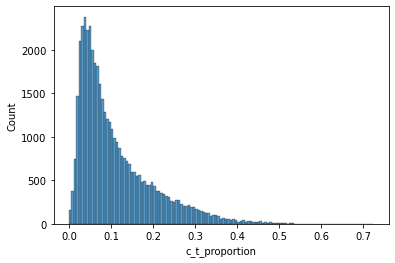

In [14]:
sns.histplot(data[data['c_t_proportion'] != 0]['c_t_proportion'])

<AxesSubplot:xlabel='pc_c_proportion', ylabel='Count'>

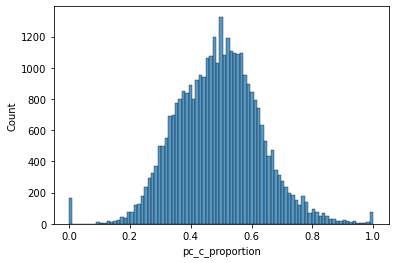

In [15]:
sns.histplot(data['pc_c_proportion'])

In [16]:
# By total 
by_total.groupby(['Sex', 'Age Group'])['COVID-19 Deaths'].median()

Sex        Age Group  
All Sexes  1-4                0.0
           15-24             49.0
           18-29            101.0
           25-34            161.0
           30-39            255.5
           35-44            395.5
           40-49            605.5
           45-54            896.5
           5-14              14.0
           50-64           2426.0
           55-64           1890.0
           65-74           3377.5
           75-84           3928.5
           85 and over     4189.0
           <1                15.0
           all            14953.5
Female     1-4                0.0
           15-24             22.0
           18-29             54.0
           25-34             79.0
           30-39            107.0
           35-44            153.0
           40-49            225.0
           45-54            307.5
           5-14               0.0
           50-64            892.0
           55-64            708.5
           65-74           1328.0
           75-84         

Text(0.5, 1.0, 'By total covid-19 deaths')

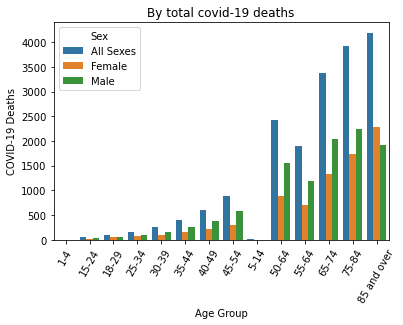

In [17]:
a = by_total.groupby(['Sex', 'Age Group'])['COVID-19 Deaths'].median().to_frame().reset_index()
a = a[(a['Age Group'] != '<1') & (a['Age Group'] != 'all')]
sns.barplot(x = a['Age Group'], y = a['COVID-19 Deaths'], hue = a['Sex'])
plt.xticks(rotation = 60)
plt.title('By total covid-19 deaths')

From the plot we can get that before the age of 85, the number of covid related deaths are higher in males than in females.

Text(0.5, 1.0, 'By year covid-19 deaths proportion of total deaths')

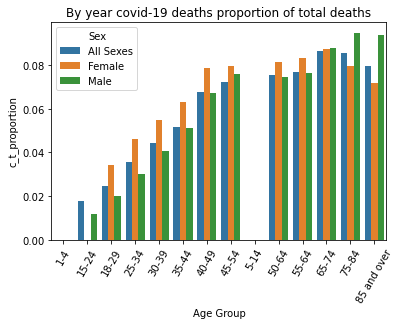

In [18]:
# By year 
b = by_year.groupby(['Sex', 'Age Group'])['c_t_proportion'].median().to_frame().reset_index()
b = b[(b['Age Group'] != '<1') & (b['Age Group'] != 'all')]
sns.barplot(x = b['Age Group'], y = b['c_t_proportion'], hue = b['Sex'])
plt.xticks(rotation = 60)
plt.title('By year covid-19 deaths proportion of total deaths')

From the plot above, among all disease deaths, the proportion of women dying from COVID-19 is higher than that of men before the age of 75, while males die of COVID-19 at much higher rates than females after the age of 75.

Text(0.5, 1.0, 'By year the proportion of covid&pneumonia deaths to covid-19 deaths')

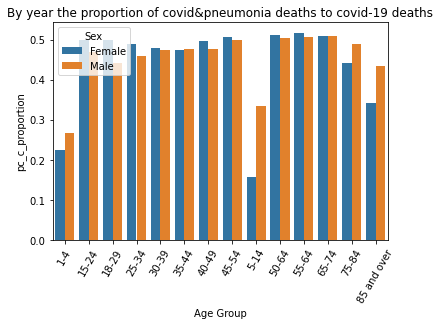

In [19]:
b_1 = by_year.groupby(['Sex', 'Age Group'])['pc_c_proportion'].median().to_frame().reset_index()
b_1 = b_1[(b_1['Age Group'] != '<1') & (b_1['Age Group'] != 'all') & (b_1['Sex'] != 'All Sexes')]
sns.barplot(x = b_1['Age Group'], y = b_1['pc_c_proportion'], hue = b_1['Sex'])
plt.xticks(rotation = 60)
plt.title('By year the proportion of covid&pneumonia deaths to covid-19 deaths')

From the plot above, we can observe that when people is younger than 15 or older than 75, more males who die of covid-19 also have pneumonia, wheras the conditions of males and females are similar in the other age group.

Text(0.5, 1.0, 'By month the proportion of covid&pneumonia&nfluenza deaths to total deaths')

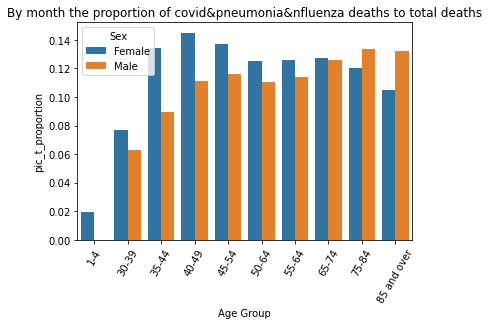

In [20]:
# By month 
c_1 = by_month.groupby(['Sex', 'Age Group'])['pic_t_proportion'].median().to_frame().reset_index()
c_1 = c_1[(c_1['Age Group'] != '<1') & (c_1['Age Group'] != 'all') & (c_1['Sex'] != 'All Sexes')]
c_1 = c_1[c_1['pic_t_proportion'] != 0]
sns.barplot(x = c_1['Age Group'], y = c_1['pic_t_proportion'], hue = c_1['Sex'])
plt.xticks(rotation = 60)
plt.title('By month the proportion of covid&pneumonia&nfluenza deaths to total deaths')

From the plot above, among all disease deaths, the proportion of women dying from COVID-19&Pneumonia&Influenza is higher than that of men before the age of 75, while males die of COVID-19 at much higher rates than females after the age of 75.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

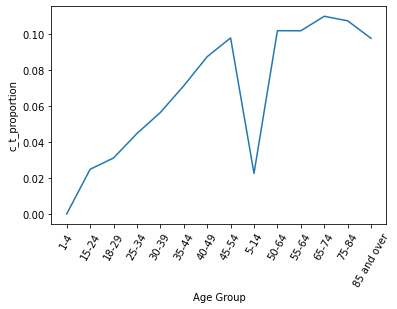

In [21]:
# the conditon of differen age groups - by total
d = by_total[(by_total['Age Group'] != 'all') & (by_total['Age Group'] != '<1')]
d = d.groupby('Age Group')['c_t_proportion'].median()
sns.lineplot(x = d.index, y = d)
plt.xticks(rotation = 60)

In [22]:
s = data.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending = False)[:10]
s

State
United States    15104316.0
California        1458486.0
Texas             1432276.0
Florida           1068406.0
Pennsylvania       680255.0
Ohio               641708.0
New York           538843.0
New York City      505561.0
Illinois           504151.0
Georgia            490989.0
Name: COVID-19 Deaths, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Ohio'),
  Text(6, 0, 'New York'),
  Text(7, 0, 'New York City'),
  Text(8, 0, 'Illinois'),
  Text(9, 0, 'Georgia')])

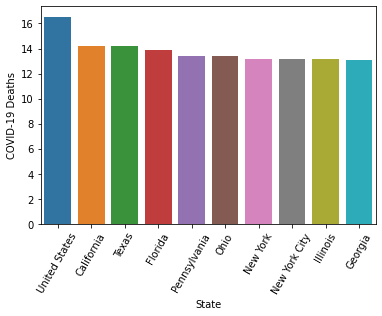

In [23]:
s_1 = s[:10].to_frame().reset_index()
sns.barplot(x = s_1['State'], y = np.log(s_1['COVID-19 Deaths']))
plt.xticks(rotation = 60)

In [24]:
# Similar number of collected data from each state
data['State'].value_counts().unique()

array([2112, 2111, 2110, 2109, 2108, 2107, 2106, 2105, 2104, 2103, 2102,
       2099, 2098, 2093, 2091, 2090, 2086, 2083, 2075, 2074, 2073, 2067,
       2053, 2052, 2051, 2049, 2048, 2046, 2008, 2006, 2002, 1996, 1988,
       1968, 1964, 1957, 1956, 1895, 1851])